# Looking for HVC neuron responses to opto

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import spikeinterface.full as si
import traceback
from scipy.io import wavfile

import sys
sys.path.append('/mnt/cube/lo/envs/ceciestunepipe')
from ceciestunepipe.mods import spike_util as su
from ceciestunepipe.util import wavutil as wu
from ceciestunepipe.file import bcistructure as et

In [2]:
sess_par = {
    'bird':'z_c7r3_24', # bird ID
    'sess':'2024-10-26', # session date
    'probe':{'probe_type':'neuropixels-1.0'}, # probe specs
    'epoch':'1146_g0', # epoch
    'ephys_software':'sglx', # recording software, sglx or oe
    'sorter':'kilosort4', # spike sorting algorithm
    'sort':'sort_0', # sort index
}

In [3]:
exp_struct = et.get_exp_struct(sess_par['bird'], sess_par['sess'], sort=sess_par['sort'])
exp_struct['folders']['derived']

'/mnt/cube/chronic_ephys/der/z_c7r3_24/2024-10-26/sglx'

### Load opto stim

In [4]:
pkl_path = os.path.join(exp_struct['folders']['derived'], sess_par['epoch'], 'wav_adc-npy_meta.pickle')
with open(pkl_path, 'rb') as fp:
    meta_dict = pickle.load(fp)
adc_file_name = os.path.join(exp_struct['folders']['derived'], sess_par['epoch'], 'wav_adc.npy')
opto_stim = np.load(adc_file_name, mmap_mode='r').astype(meta_dict['dtype']).reshape(meta_dict['shape'])

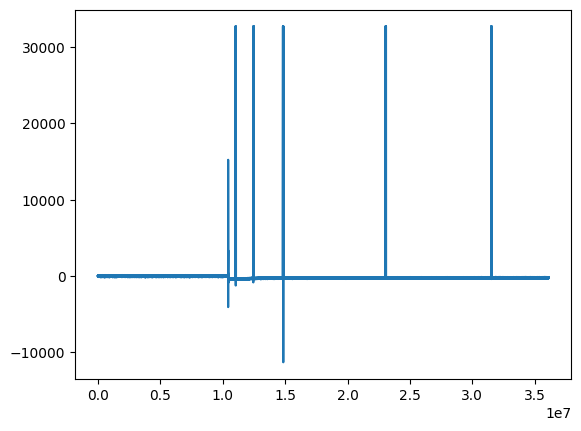

In [5]:
plt.plot(opto_stim)

In [6]:
stim_ids = np.where(opto_stim > 10000)[0]

In [7]:
first_pulse = stim_ids[(stim_ids > 10500000) & (stim_ids < 12000000)]
first_pulse

array([11024207, 11024208, 11024209, ..., 11064191, 11064192, 11064193])

In [8]:
second_pulse = stim_ids[(stim_ids > 12000000) & (stim_ids < 14000000)]
second_pulse

array([12449800, 12449801, 12449802, ..., 12505797, 12505798, 12505799])

In [9]:
third_pulse = stim_ids[(stim_ids > 14000000) & (stim_ids < 20000000)]
third_pulse

array([14818946, 14818947, 14818948, ..., 14874942, 14874943, 14874944])

In [10]:
fourth_pulse = stim_ids[(stim_ids > 20000000) & (stim_ids < 25000000)]
fourth_pulse

array([23029678, 23029679, 23029680, ..., 23085675, 23085676, 23085677])

In [11]:
fifth_pulse = stim_ids[(stim_ids > 25000000)]
fifth_pulse

array([31497000, 31497001, 31497002, ..., 31552996, 31552997, 31552998])

### Load spk_df

In [12]:
sort_dir = '/mnt/cube/chronic_ephys/der/{}/{}/{}/{}/{}/{}/'.format(
    sess_par['bird'],sess_par['sess'],sess_par['ephys_software'],
    sess_par['epoch'],sess_par['sorter'],sess_par['sort'])

In [13]:
with open(os.path.join(sort_dir, 'spk_df.pickle'), 'rb') as handle:
    spk_df = pickle.load(handle)
fs = 30000

In [14]:
spk_df

,unit,spike_train,unit_locations,abs_unit_locations,quality_label,firing_rate,isi_violations_ratio,isi_violations_count,num_spikes,presence_ratio,snr
0,6,"[22653, 119832, 226936, 226992, 304218, 390194...","[293.50994966528003, 1684.350186954659, 1.0000...","[2676.309155726963, -230.73567603533866, 391.1...",mua_4,0.348916,6.065648,2,315,1.000000,3.672222
1,9,"[604785, 831834, 1256873, 1997181, 2258262, 27...","[-23.143740773275137, 1788.2873417346111, 5.98...","[2359.655465288408, -126.7985212553865, 396.15...",sua_2,0.166151,0.000000,0,150,0.933333,11.349414
2,7,"[17737, 29209, 37859, 39973, 48376, 53543, 536...","[23.97866041555105, 1798.280934569032, 1.00000...","[2406.777866477234, -116.80492842096555, 391.1...",sua_3,3.091507,0.811275,21,2791,1.000000,4.749082
3,2,"[65517, 239782, 248000, 281889, 288968, 335045...","[25.440542817543076, 1803.3976728673422, 1.000...","[2408.239748879226, -111.68819012265544, 391.1...",sua_1,0.592604,0.000000,0,535,1.000000,11.054887
4,3,"[7948, 8023, 8652, 9901, 10150, 19705, 22553, ...","[-1.8977450418416957, 1806.0279869417375, 1.00...","[2380.9014610198415, -109.05787604826014, 391....",sua_2,5.439768,0.349371,28,4911,1.000000,4.135297
...,...,...,...,...,...,...,...,...,...,...,...
929,935,"[17827, 74785, 76618, 190413, 214514, 230285, ...","[-1.83021390670634, 4839.6116611789685, 1.0000...","[2380.9689921549766, 2924.525798188971, 391.17...",sua_2,1.338065,0.206222,1,1208,1.000000,2.093616
930,937,"[17945, 22304, 34968, 37262, 59165, 72294, 741...","[-0.9159537712475512, 4840.8490929632035, 8.87...","[2381.8832522904354, 2925.763229973206, 399.04...",sua_1,0.896105,0.000000,0,809,1.000000,8.694173
931,939,"[206434, 773739, 775894, 1689854, 2027345, 204...","[25.07192268376192, 4881.714320804296, 1.00000...","[2407.871128745445, 2966.6284578142986, 391.17...",mua_4,0.152858,31.603860,2,138,1.000000,6.908632
932,940,"[116582, 774874, 776151, 988084, 1277486, 1679...","[11.594511393134873, 4905.841841777834, 71.611...","[2394.3937174548178, 2990.7559787878363, 461.7...",noise,0.830753,21.934596,41,750,1.000000,5.543631


### Plot all stim trials

In [15]:
start_opto = min(first_pulse)-meta_dict['s_f']
end_opto = max(first_pulse)+meta_dict['s_f']

In [16]:
start_sample_ap = start_opto / meta_dict['s_f'] * fs
end_sample_ap = end_opto / meta_dict['s_f'] * fs

In [17]:
plot_opto_stim = opto_stim[start_opto:end_opto]
plot_opto_stim = np.where(plot_opto_stim < 1000, 0, 1)

In [18]:
# retrieve spike trains
def make_raster(spk_df, ids, start_sample, end_sample):
    spk_arr = np.zeros((len(ids), int(end_sample - start_sample)))
    
    for i,n in enumerate(ids):
        unit_spk_t = spk_df.loc[n, 'spike_train']
        unit_spk_t = unit_spk_t[(unit_spk_t > start_sample) & (unit_spk_t < end_sample)]
        spk_arr[i, (unit_spk_t - start_sample).astype(int)] = 1
    
    return spk_arr

# make spike raster for plotting
plot_df = spk_df[spk_df['quality_label'] != 'noise']
spike_arr = make_raster(plot_df, plot_df.index.to_list(), start_sample_ap, end_sample_ap)

# ra_list = plot_df[plot_df['nucleus']=='RA'].index.tolist()
# hvc_list = plot_df[plot_df['nucleus']=='HVC'].index.tolist()

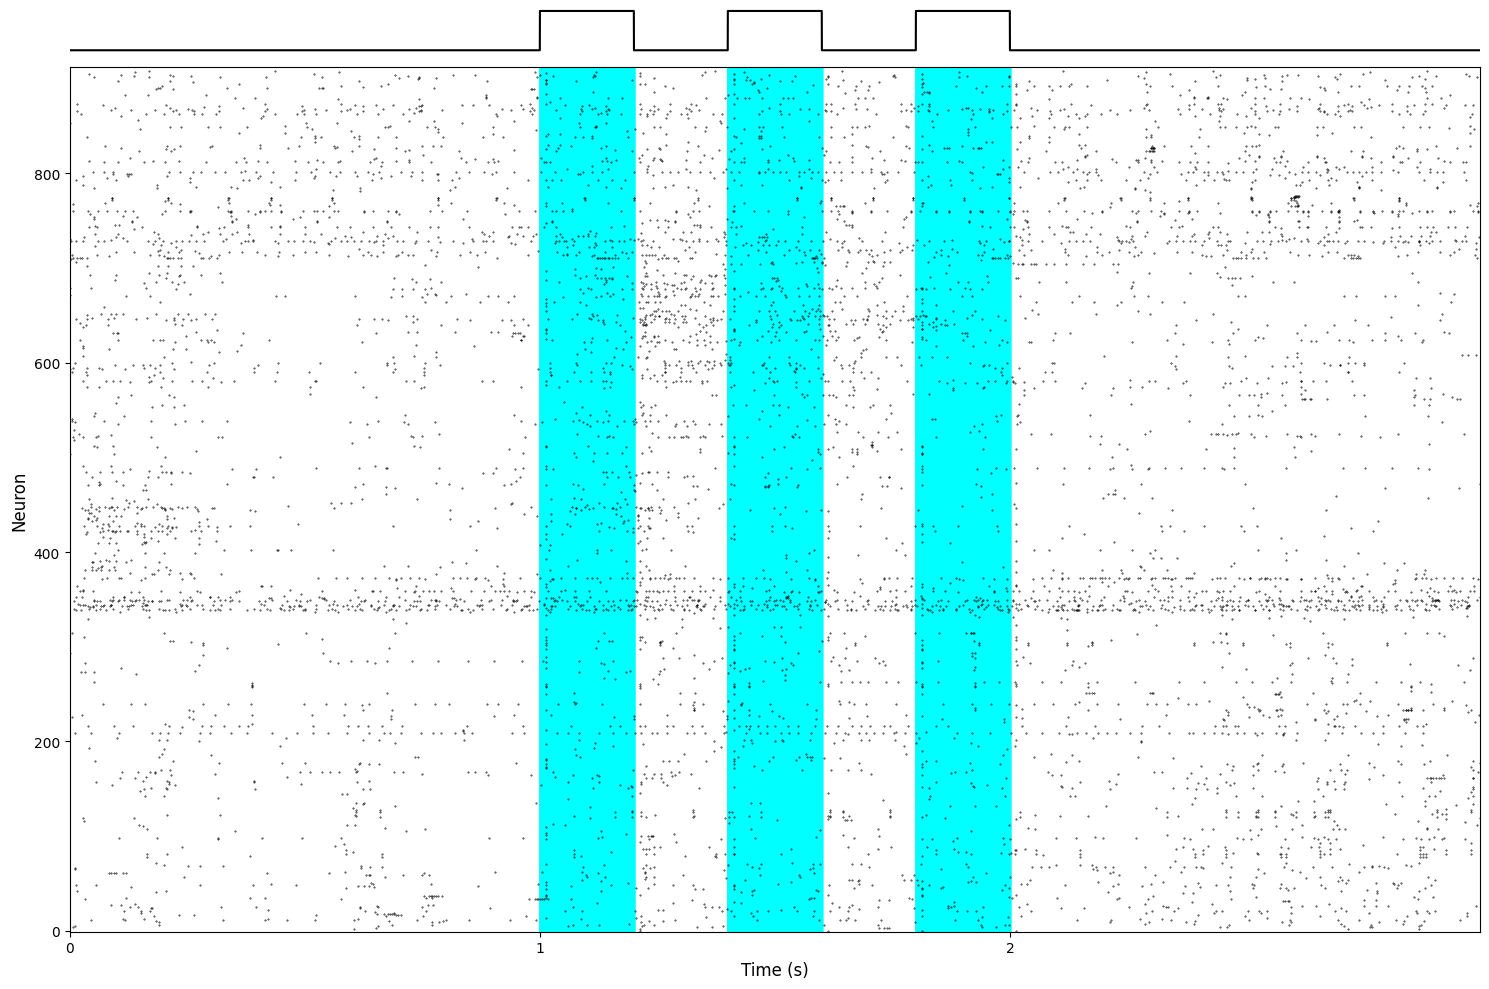

In [19]:
# plot raster
fig, ax = plt.subplots(nrows=2, gridspec_kw={'height_ratios': [1, 20]}, figsize=(15, 10))

# plot opto stims
ax[0].plot(plot_opto_stim.flatten(), 'black')
ax[0].set_xlim([0, len(opto_stim[start_opto:end_opto].flatten())])
ax[0].set_axis_off()

# plot spike raster
x_trial, x_time = np.where(spike_arr>0)
ax[1].plot(x_time, x_trial, '.', color='k', markersize=0.75, rasterized=True)
# for row in ra_list:
#     ax[2].plot(x_time[x_trial == row], x_trial[x_trial == row], '.', color='r', markersize=0.75, rasterized=True)
# for row in hvc_list:
#     ax[2].plot(x_time[x_trial == row], x_trial[x_trial == row], '.', color='b', markersize=0.75, rasterized=True)
ax[1].set_xlim(0, spike_arr.shape[1])
ax[1].set_ylim(-1, spike_arr.shape[0] + 1)
ax[1].set_xticks(np.arange(0, spike_arr.shape[1], fs).tolist())
ax[1].set_xticklabels([str(int(e)) for e in np.arange(0,np.ceil(spike_arr.shape[1]/fs))])
ax[1].set_xlabel('Time (s)', fontsize=12)
ax[1].set_ylabel('Neuron', fontsize=12)
# light on indices
stim_indices = np.where(plot_opto_stim == 1)[0]
stim_indices_ap = stim_indices / meta_dict['s_f'] * fs
intervals = np.split(stim_indices_ap, np.where(np.diff(stim_indices_ap) != 1)[0] + 1)
# shade light-on intervals
for interval in intervals:
    if len(interval) > 0:
        ax[1].axvspan(interval[0], interval[-1], color='cyan', alpha=0.2)

plt.tight_layout()
plt.show()

In [20]:
start_opto = min(second_pulse)-meta_dict['s_f']
end_opto = max(second_pulse)+meta_dict['s_f']

In [21]:
start_sample_ap = start_opto / meta_dict['s_f'] * fs
end_sample_ap = end_opto / meta_dict['s_f'] * fs

In [22]:
plot_opto_stim = opto_stim[start_opto:end_opto]
plot_opto_stim = np.where(plot_opto_stim < 1000, 0, 1)

In [23]:
# retrieve spike trains
def make_raster(spk_df, ids, start_sample, end_sample):
    spk_arr = np.zeros((len(ids), int(end_sample - start_sample)))
    
    for i,n in enumerate(ids):
        unit_spk_t = spk_df.loc[n, 'spike_train']
        unit_spk_t = unit_spk_t[(unit_spk_t > start_sample) & (unit_spk_t < end_sample)]
        spk_arr[i, (unit_spk_t - start_sample).astype(int)] = 1
    
    return spk_arr

# make spike raster for plotting
plot_df = spk_df[spk_df['quality_label'] != 'noise']
spike_arr = make_raster(plot_df, plot_df.index.to_list(), start_sample_ap, end_sample_ap)

# ra_list = plot_df[plot_df['nucleus']=='RA'].index.tolist()
# hvc_list = plot_df[plot_df['nucleus']=='HVC'].index.tolist()

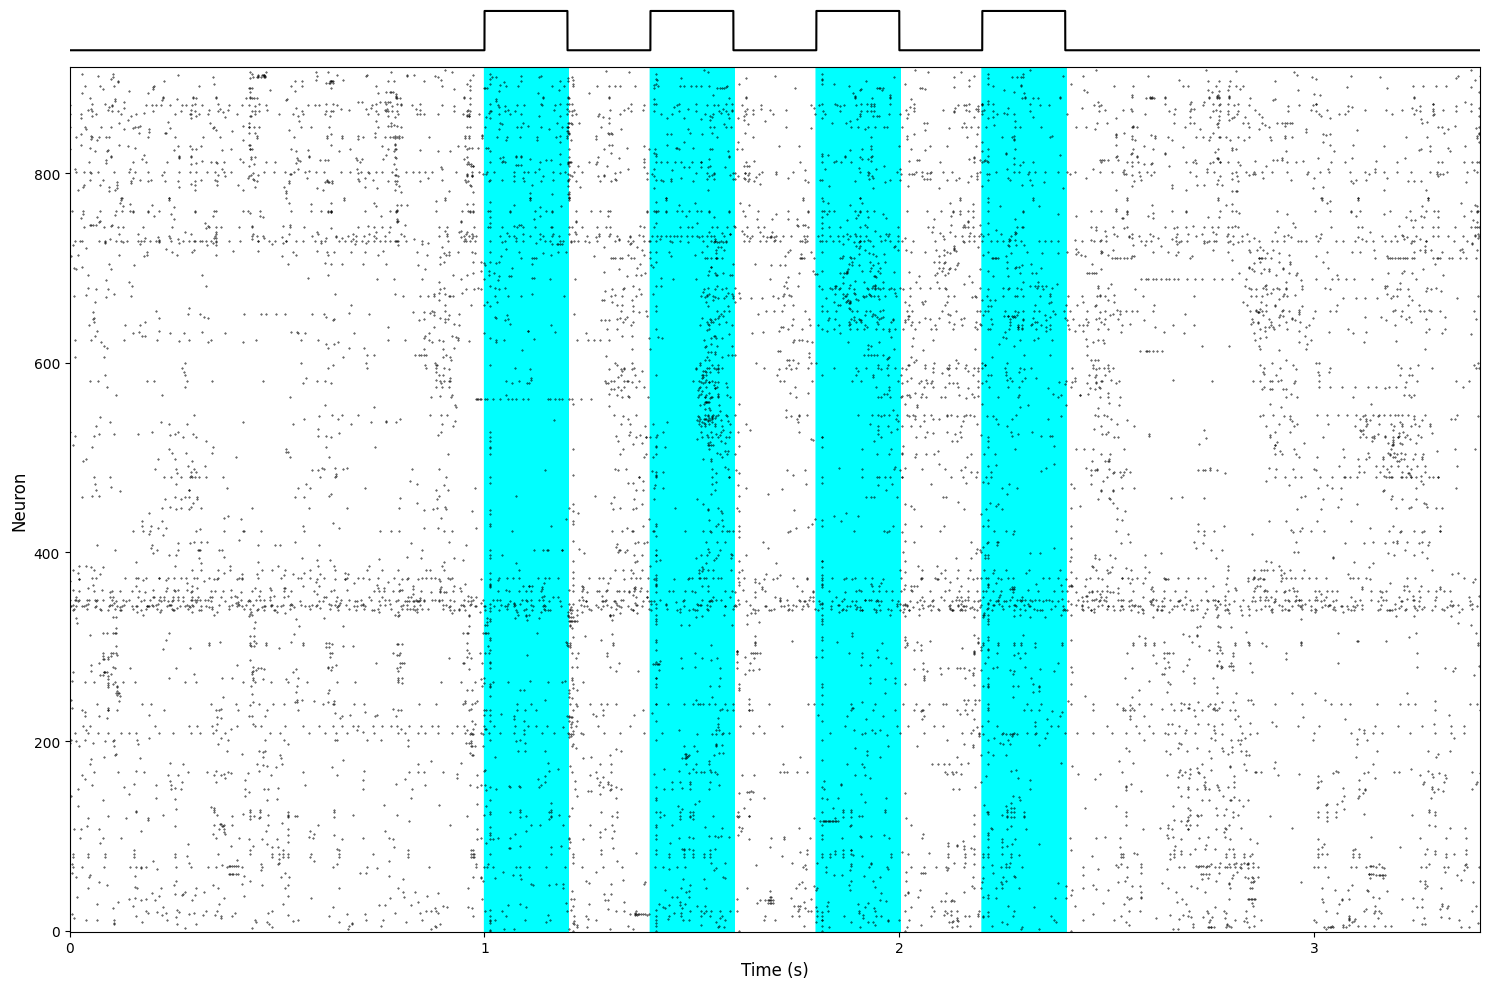

In [24]:
# plot raster
fig, ax = plt.subplots(nrows=2, gridspec_kw={'height_ratios': [1, 20]}, figsize=(15, 10))

# plot opto stims
ax[0].plot(plot_opto_stim.flatten(), 'black')
ax[0].set_xlim([0, len(opto_stim[start_opto:end_opto].flatten())])
ax[0].set_axis_off()

# plot spike raster
x_trial, x_time = np.where(spike_arr>0)
ax[1].plot(x_time, x_trial, '.', color='k', markersize=0.75, rasterized=True)
# for row in ra_list:
#     ax[2].plot(x_time[x_trial == row], x_trial[x_trial == row], '.', color='r', markersize=0.75, rasterized=True)
# for row in hvc_list:
#     ax[2].plot(x_time[x_trial == row], x_trial[x_trial == row], '.', color='b', markersize=0.75, rasterized=True)
ax[1].set_xlim(0, spike_arr.shape[1])
ax[1].set_ylim(-1, spike_arr.shape[0] + 1)
ax[1].set_xticks(np.arange(0, spike_arr.shape[1], fs).tolist())
ax[1].set_xticklabels([str(int(e)) for e in np.arange(0,np.ceil(spike_arr.shape[1]/fs))])
ax[1].set_xlabel('Time (s)', fontsize=12)
ax[1].set_ylabel('Neuron', fontsize=12)
# light on indices
stim_indices = np.where(plot_opto_stim == 1)[0]
stim_indices_ap = stim_indices / meta_dict['s_f'] * fs
intervals = np.split(stim_indices_ap, np.where(np.diff(stim_indices_ap) != 1)[0] + 1)
# shade light-on intervals
for interval in intervals:
    if len(interval) > 0:
        ax[1].axvspan(interval[0], interval[-1], color='cyan', alpha=0.2)

plt.tight_layout()
plt.show()

In [25]:
start_opto = min(third_pulse)-meta_dict['s_f']
end_opto = max(third_pulse)+meta_dict['s_f']

In [26]:
start_sample_ap = start_opto / meta_dict['s_f'] * fs
end_sample_ap = end_opto / meta_dict['s_f'] * fs

In [27]:
plot_opto_stim = opto_stim[start_opto:end_opto]
plot_opto_stim = np.where(plot_opto_stim < 1000, 0, 1)

In [28]:
# retrieve spike trains
def make_raster(spk_df, ids, start_sample, end_sample):
    spk_arr = np.zeros((len(ids), int(end_sample - start_sample)))
    
    for i,n in enumerate(ids):
        unit_spk_t = spk_df.loc[n, 'spike_train']
        unit_spk_t = unit_spk_t[(unit_spk_t > start_sample) & (unit_spk_t < end_sample)]
        spk_arr[i, (unit_spk_t - start_sample).astype(int)] = 1
    
    return spk_arr

# make spike raster for plotting
plot_df = spk_df[spk_df['quality_label'] != 'noise']
spike_arr = make_raster(plot_df, plot_df.index.to_list(), start_sample_ap, end_sample_ap)

# ra_list = plot_df[plot_df['nucleus']=='RA'].index.tolist()
# hvc_list = plot_df[plot_df['nucleus']=='HVC'].index.tolist()

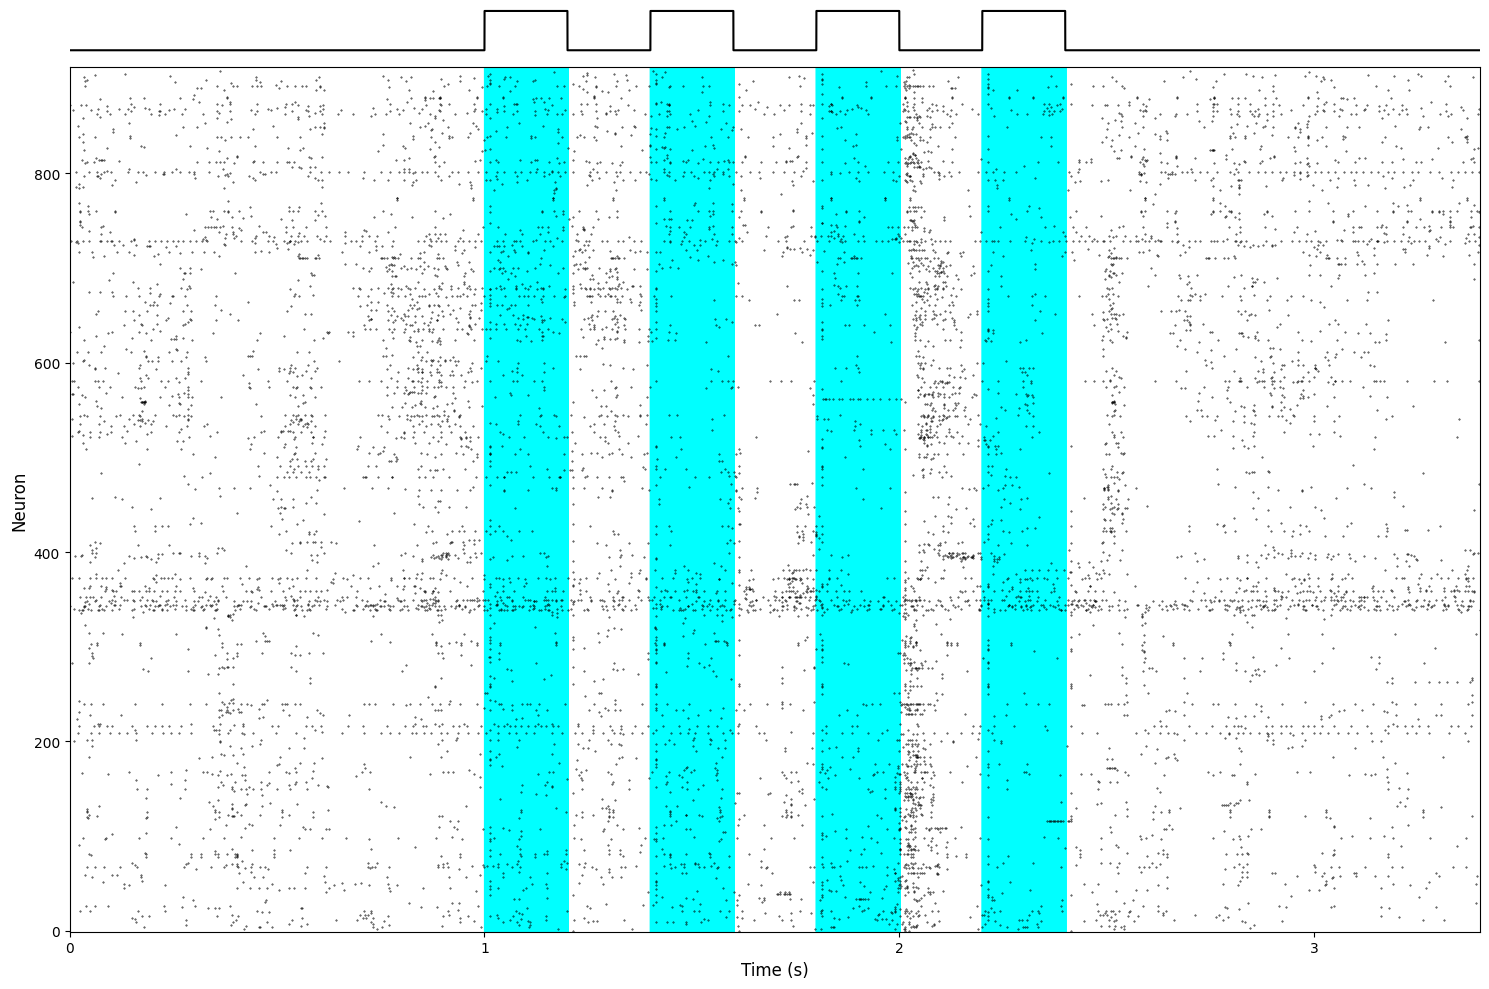

In [29]:
# plot raster
fig, ax = plt.subplots(nrows=2, gridspec_kw={'height_ratios': [1, 20]}, figsize=(15, 10))

# plot opto stims
ax[0].plot(plot_opto_stim.flatten(), 'black')
ax[0].set_xlim([0, len(opto_stim[start_opto:end_opto].flatten())])
ax[0].set_axis_off()

# plot spike raster
x_trial, x_time = np.where(spike_arr>0)
ax[1].plot(x_time, x_trial, '.', color='k', markersize=0.75, rasterized=True)
# for row in ra_list:
#     ax[2].plot(x_time[x_trial == row], x_trial[x_trial == row], '.', color='r', markersize=0.75, rasterized=True)
# for row in hvc_list:
#     ax[2].plot(x_time[x_trial == row], x_trial[x_trial == row], '.', color='b', markersize=0.75, rasterized=True)
ax[1].set_xlim(0, spike_arr.shape[1])
ax[1].set_ylim(-1, spike_arr.shape[0] + 1)
ax[1].set_xticks(np.arange(0, spike_arr.shape[1], fs).tolist())
ax[1].set_xticklabels([str(int(e)) for e in np.arange(0,np.ceil(spike_arr.shape[1]/fs))])
ax[1].set_xlabel('Time (s)', fontsize=12)
ax[1].set_ylabel('Neuron', fontsize=12)
# light on indices
stim_indices = np.where(plot_opto_stim == 1)[0]
stim_indices_ap = stim_indices / meta_dict['s_f'] * fs
intervals = np.split(stim_indices_ap, np.where(np.diff(stim_indices_ap) != 1)[0] + 1)
# shade light-on intervals
for interval in intervals:
    if len(interval) > 0:
        ax[1].axvspan(interval[0], interval[-1], color='cyan', alpha=0.2)

plt.tight_layout()
plt.show()

In [30]:
start_opto = min(fourth_pulse)-meta_dict['s_f']
end_opto = max(fourth_pulse)+meta_dict['s_f']

In [31]:
start_sample_ap = start_opto / meta_dict['s_f'] * fs
end_sample_ap = end_opto / meta_dict['s_f'] * fs

In [32]:
plot_opto_stim = opto_stim[start_opto:end_opto]
plot_opto_stim = np.where(plot_opto_stim < 1000, 0, 1)

In [33]:
# retrieve spike trains
def make_raster(spk_df, ids, start_sample, end_sample):
    spk_arr = np.zeros((len(ids), int(end_sample - start_sample)))
    
    for i,n in enumerate(ids):
        unit_spk_t = spk_df.loc[n, 'spike_train']
        unit_spk_t = unit_spk_t[(unit_spk_t > start_sample) & (unit_spk_t < end_sample)]
        spk_arr[i, (unit_spk_t - start_sample).astype(int)] = 1
    
    return spk_arr

# make spike raster for plotting
plot_df = spk_df[spk_df['quality_label'] != 'noise']
spike_arr = make_raster(plot_df, plot_df.index.to_list(), start_sample_ap, end_sample_ap)

# ra_list = plot_df[plot_df['nucleus']=='RA'].index.tolist()
# hvc_list = plot_df[plot_df['nucleus']=='HVC'].index.tolist()

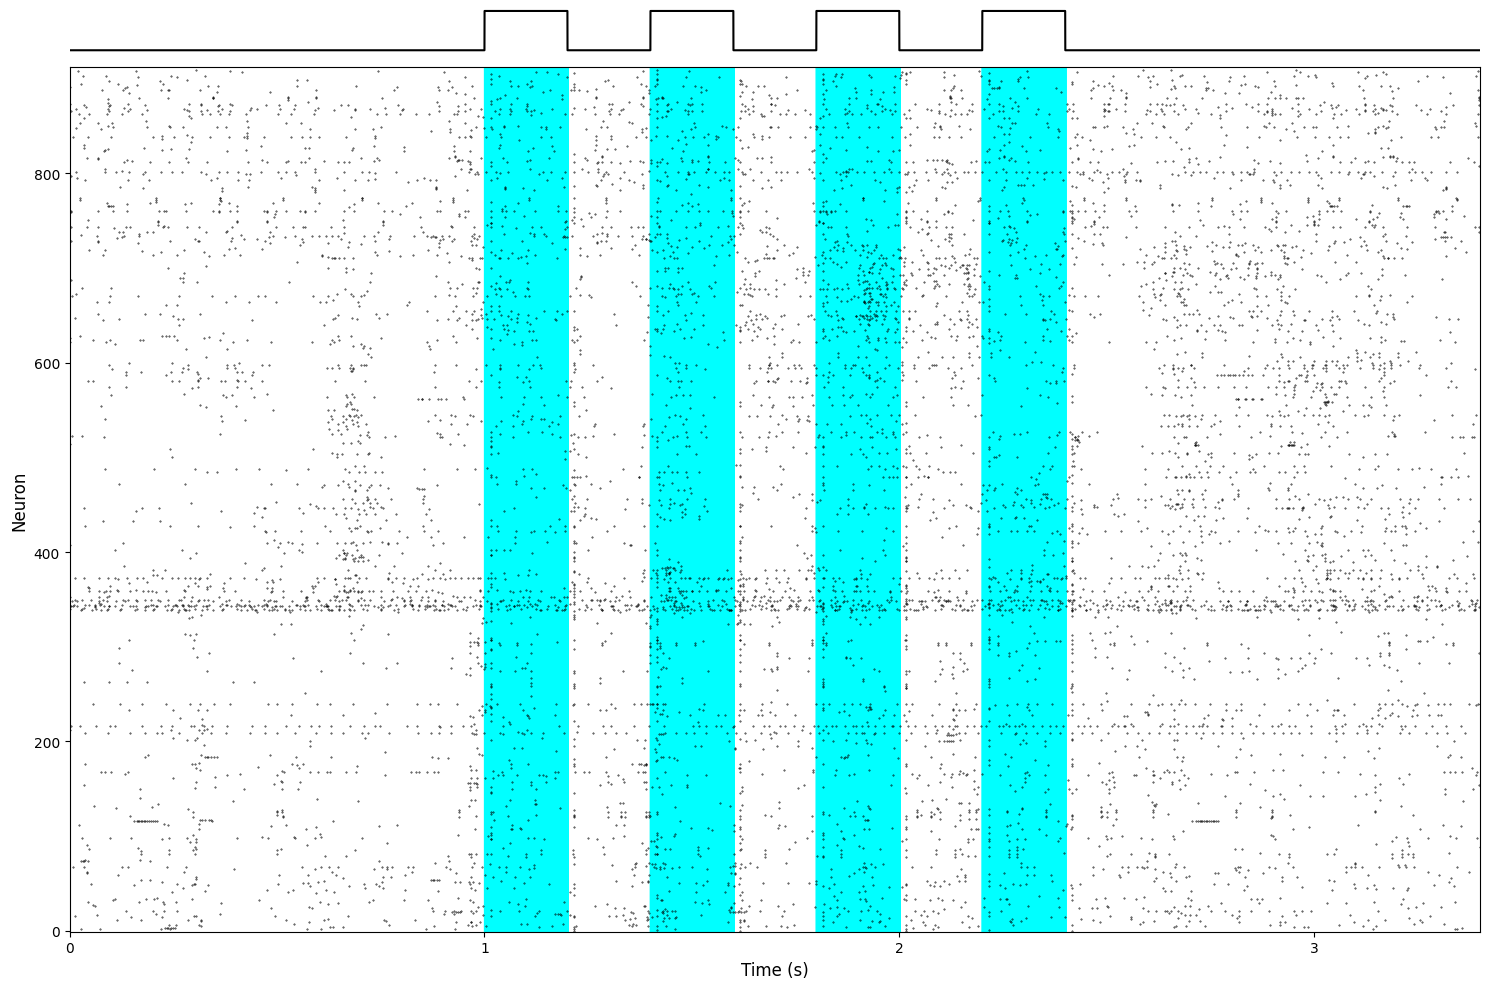

In [34]:
# plot raster
fig, ax = plt.subplots(nrows=2, gridspec_kw={'height_ratios': [1, 20]}, figsize=(15, 10))

# plot opto stims
ax[0].plot(plot_opto_stim.flatten(), 'black')
ax[0].set_xlim([0, len(opto_stim[start_opto:end_opto].flatten())])
ax[0].set_axis_off()

# plot spike raster
x_trial, x_time = np.where(spike_arr>0)
ax[1].plot(x_time, x_trial, '.', color='k', markersize=0.75, rasterized=True)
# for row in ra_list:
#     ax[2].plot(x_time[x_trial == row], x_trial[x_trial == row], '.', color='r', markersize=0.75, rasterized=True)
# for row in hvc_list:
#     ax[2].plot(x_time[x_trial == row], x_trial[x_trial == row], '.', color='b', markersize=0.75, rasterized=True)
ax[1].set_xlim(0, spike_arr.shape[1])
ax[1].set_ylim(-1, spike_arr.shape[0] + 1)
ax[1].set_xticks(np.arange(0, spike_arr.shape[1], fs).tolist())
ax[1].set_xticklabels([str(int(e)) for e in np.arange(0,np.ceil(spike_arr.shape[1]/fs))])
ax[1].set_xlabel('Time (s)', fontsize=12)
ax[1].set_ylabel('Neuron', fontsize=12)
# light on indices
stim_indices = np.where(plot_opto_stim == 1)[0]
stim_indices_ap = stim_indices / meta_dict['s_f'] * fs
intervals = np.split(stim_indices_ap, np.where(np.diff(stim_indices_ap) != 1)[0] + 1)
# shade light-on intervals
for interval in intervals:
    if len(interval) > 0:
        ax[1].axvspan(interval[0], interval[-1], color='cyan', alpha=0.2)

plt.tight_layout()
plt.show()

In [35]:
start_opto = min(fifth_pulse)-meta_dict['s_f']
end_opto = max(fifth_pulse)+meta_dict['s_f']

In [36]:
start_sample_ap = start_opto / meta_dict['s_f'] * fs
end_sample_ap = end_opto / meta_dict['s_f'] * fs

In [37]:
plot_opto_stim = opto_stim[start_opto:end_opto]
plot_opto_stim = np.where(plot_opto_stim < 1000, 0, 1)

In [38]:
# retrieve spike trains
def make_raster(spk_df, ids, start_sample, end_sample):
    spk_arr = np.zeros((len(ids), int(end_sample - start_sample)))
    
    for i,n in enumerate(ids):
        unit_spk_t = spk_df.loc[n, 'spike_train']
        unit_spk_t = unit_spk_t[(unit_spk_t > start_sample) & (unit_spk_t < end_sample)]
        spk_arr[i, (unit_spk_t - start_sample).astype(int)] = 1
    
    return spk_arr

# make spike raster for plotting
plot_df = spk_df[spk_df['quality_label'] != 'noise']
spike_arr = make_raster(plot_df, plot_df.index.to_list(), start_sample_ap, end_sample_ap)

# ra_list = plot_df[plot_df['nucleus']=='RA'].index.tolist()
# hvc_list = plot_df[plot_df['nucleus']=='HVC'].index.tolist()

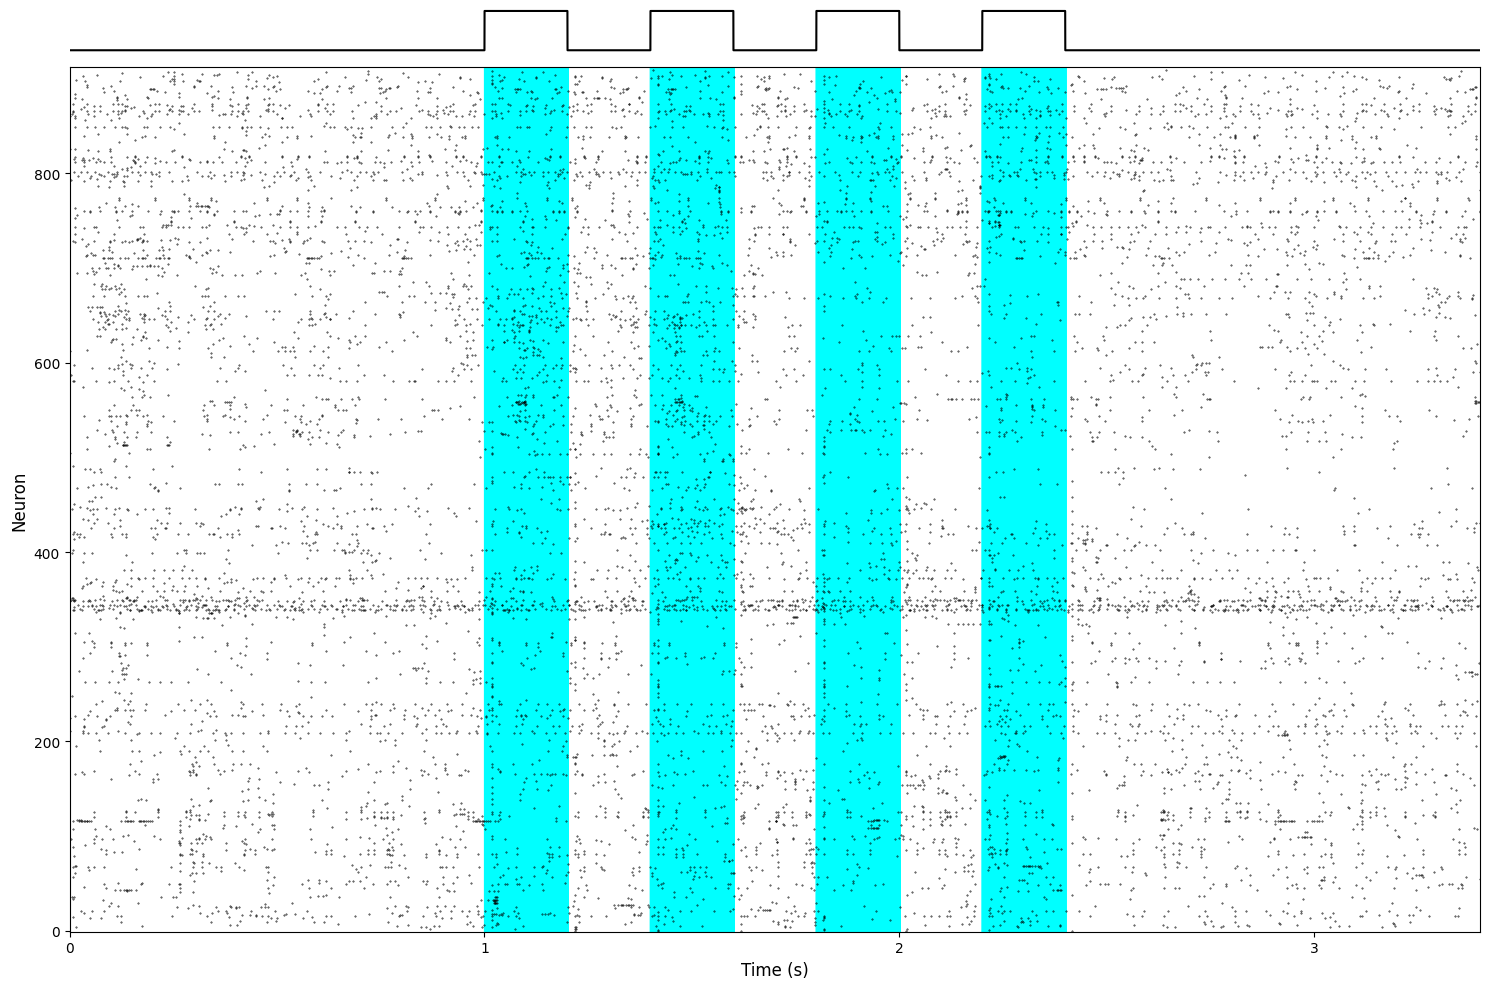

In [39]:
# plot raster
fig, ax = plt.subplots(nrows=2, gridspec_kw={'height_ratios': [1, 20]}, figsize=(15, 10))

# plot opto stims
ax[0].plot(plot_opto_stim.flatten(), 'black')
ax[0].set_xlim([0, len(opto_stim[start_opto:end_opto].flatten())])
ax[0].set_axis_off()

# plot spike raster
x_trial, x_time = np.where(spike_arr>0)
ax[1].plot(x_time, x_trial, '.', color='k', markersize=0.75, rasterized=True)
# for row in ra_list:
#     ax[2].plot(x_time[x_trial == row], x_trial[x_trial == row], '.', color='r', markersize=0.75, rasterized=True)
# for row in hvc_list:
#     ax[2].plot(x_time[x_trial == row], x_trial[x_trial == row], '.', color='b', markersize=0.75, rasterized=True)
ax[1].set_xlim(0, spike_arr.shape[1])
ax[1].set_ylim(-1, spike_arr.shape[0] + 1)
ax[1].set_xticks(np.arange(0, spike_arr.shape[1], fs).tolist())
ax[1].set_xticklabels([str(int(e)) for e in np.arange(0,np.ceil(spike_arr.shape[1]/fs))])
ax[1].set_xlabel('Time (s)', fontsize=12)
ax[1].set_ylabel('Neuron', fontsize=12)
# light on indices
stim_indices = np.where(plot_opto_stim == 1)[0]
stim_indices_ap = stim_indices / meta_dict['s_f'] * fs
intervals = np.split(stim_indices_ap, np.where(np.diff(stim_indices_ap) != 1)[0] + 1)
# shade light-on intervals
for interval in intervals:
    if len(interval) > 0:
        ax[1].axvspan(interval[0], interval[-1], color='cyan', alpha=0.2)

plt.tight_layout()
plt.show()

## Session with opto during song

In [2]:
sess_par = {
    'bird':'z_c7r3_24', # bird ID
    'sess':'2024-10-26', # session date
    'probe':{'probe_type':'neuropixels-1.0'}, # probe specs
    'epoch':'1201_g0-1330_g0-1403_g0', # epoch
    'ephys_software':'sglx', # recording software, sglx or oe
    'sorter':'kilosort4', # spike sorting algorithm
    'sort':'sort_0', # sort index
}

In [9]:
exp_struct = et.get_exp_struct(sess_par['bird'], sess_par['sess'], sort=sess_par['sort'])
exp_struct['folders']['derived']

'/mnt/cube/chronic_ephys/der/z_c7r3_24/2024-10-26/sglx'

### Load spk_df

In [10]:
sort_dir = '/mnt/cube/chronic_ephys/der/{}/{}/{}/{}/{}/{}/'.format(
    sess_par['bird'],sess_par['sess'],sess_par['ephys_software'],
    sess_par['epoch'],sess_par['sorter'],sess_par['sort'])

In [11]:
with open(os.path.join(sort_dir, 'spk_df.pickle'), 'rb') as handle:
    spk_df = pickle.load(handle)
fs = 30000

### Load bout

In [3]:
from scipy import signal

In [4]:
# load bout dataframe
bouts_dir = '/mnt/cube/chronic_ephys/der/{}/{}/{}/{}/'.format(sess_par['bird'],sess_par['sess'],sess_par['ephys_software'],sess_par['epoch'])
with open(os.path.join(bouts_dir, 'bout_pd_ap0_curated.pkl'), 'rb') as handle:
    bout_df = pickle.load(handle)
print('Bout indices:',bout_df.index.tolist())

Bout indices: [103, 108, 142, 149, 213, 343]


In [7]:
# retrieve bout info
bout_idx = 108
if bout_df.loc[bout_idx, 'bout_check']:
    waveform = bout_df.loc[bout_idx, 'waveform']
#     spectrogram = bout_df.loc[bout_idx, 'spectrogram']
    len_ms = bout_df.loc[bout_idx, 'len_ms']
    start_sample_ap = bout_df.loc[bout_idx, 'start_sample_ap_0']
    bout_fs = bout_df.loc[bout_idx, 'sample_rate']
    print('Bout loaded...')

Bout loaded...


### Load opto stim

In [14]:
pkl_path = os.path.join(exp_struct['folders']['derived'], '1330_g0', 'wav_adc-npy_meta.pickle')
with open(pkl_path, 'rb') as fp:
    meta_dict = pickle.load(fp)
adc_file_name = os.path.join(exp_struct['folders']['derived'], '1330_g0', 'wav_adc.npy')
opto_stim = np.load(adc_file_name, mmap_mode='r').astype(meta_dict['dtype']).reshape(meta_dict['shape'])

In [25]:
# had to pull these from 2-curate_acoustics notebook because the wav streams were concatenated across sessions
bout_start = 9016920
bout_end = 9303960

In [29]:
plot_opto_stim = opto_stim[bout_start:bout_end]
plot_opto_stim = np.where(plot_opto_stim < 1000, 0, 1)

In [38]:
zero_array = np.zeros((bout_fs, plot_opto_stim.shape[1]))
plot_opto_stim = np.concatenate((zero_array, plot_opto_stim))[:-40000]

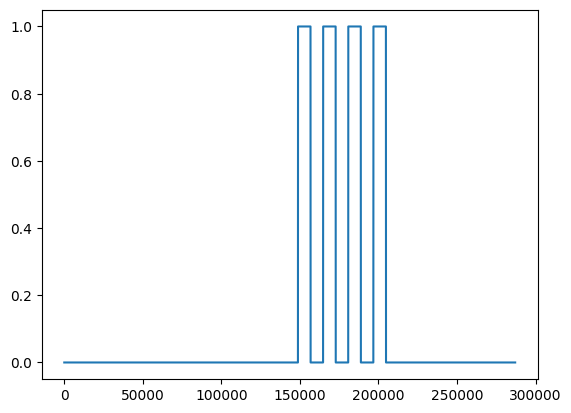

In [39]:
plt.plot(plot_opto_stim);

In [15]:
# retrieve spike trains
def make_raster(spk_df, ids, start_sample, end_sample):
    spk_arr = np.zeros((len(ids), int(end_sample - start_sample)))
    
    for i,n in enumerate(ids):
        unit_spk_t = spk_df.loc[n, 'spike_train']
        unit_spk_t = unit_spk_t[(unit_spk_t > start_sample) & (unit_spk_t < end_sample)]
        spk_arr[i, (unit_spk_t - start_sample).astype(int)] = 1
    
    return spk_arr

# make spike raster for plotting
trail_front = 1
trail_end = 1
start_idx = start_sample_ap - (fs * trail_front)
end_idx = start_sample_ap + len_ms/1000*fs + (fs * trail_front)

plot_df = spk_df[spk_df['quality_label'] != 'noise']
spike_arr = make_raster(plot_df, plot_df.index.to_list(), start_idx, end_idx)

In [16]:
def make_spec(x, fs, n_window=512, step_ms=1, f_min=100, f_max=9000, cut_off=0.000055):
    msec_samples = int(fs * 0.001)
    n_overlap = n_window - msec_samples * step_ms
    sigma = 1 / 200. * fs
    
    f, t, sxx = signal.spectrogram(x, fs,
                                   nperseg=n_window,
                                   noverlap=n_overlap,
                                   window=signal.gaussian(n_window, sigma),
                                   scaling='spectrum')
    
    if cut_off > 0:
        sxx[sxx < np.max((sxx) * cut_off)] = 1
    
    sxx[f<f_min, :] = 1

    return f[(f>f_min) & (f<f_max)], t, sxx[(f>f_min) & (f<f_max)]

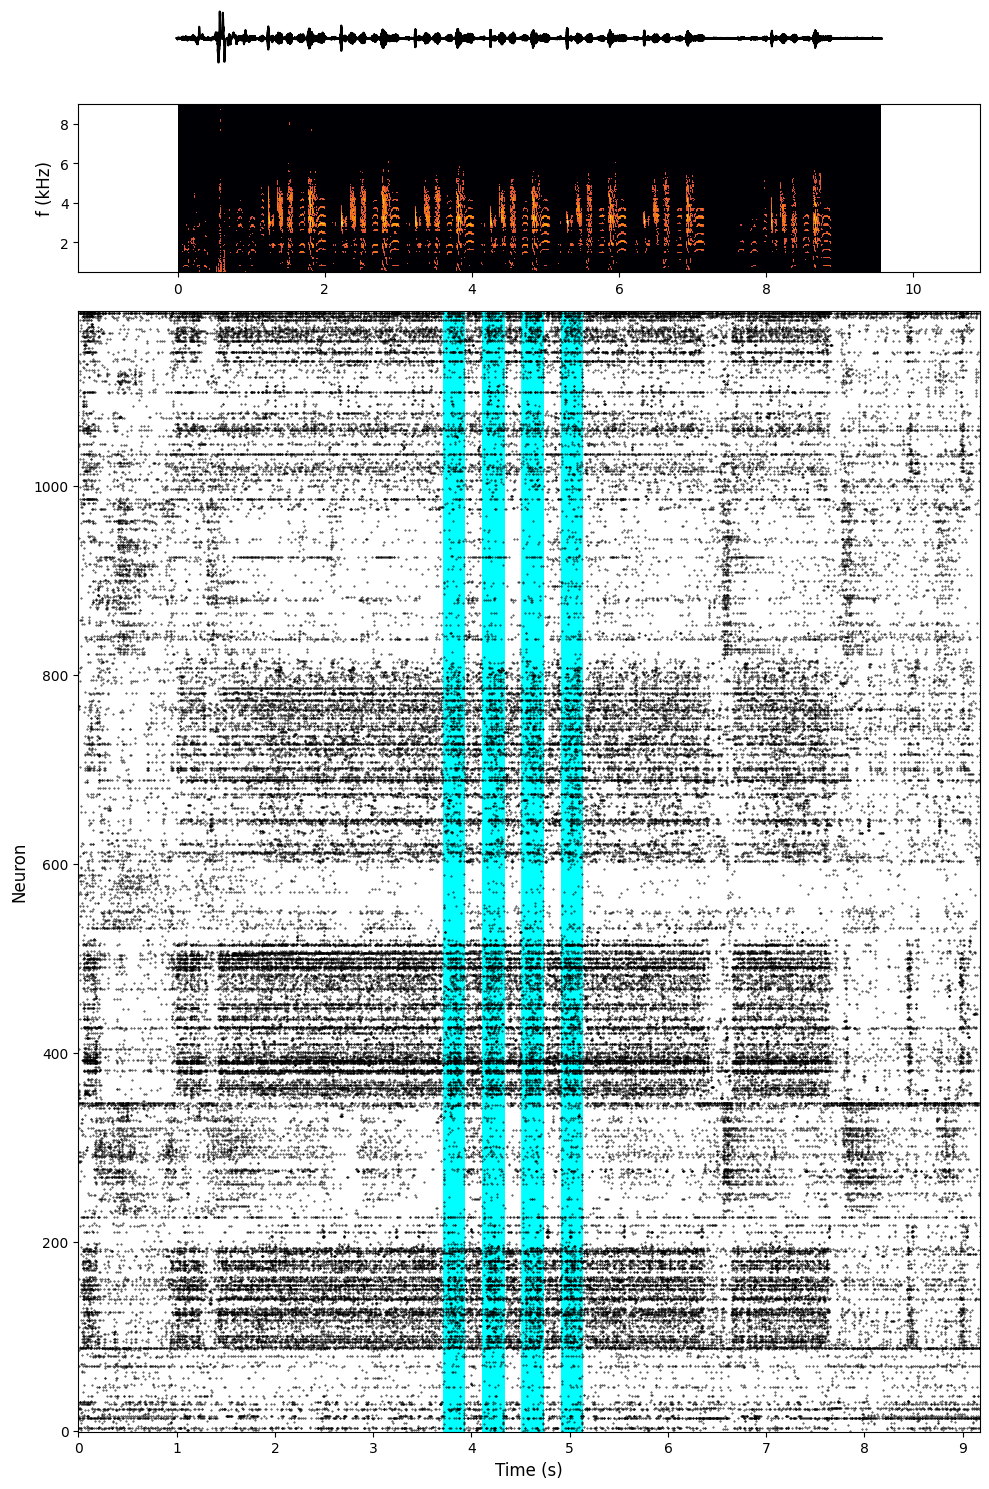

In [40]:
# plot bout with raster
fig, ax = plt.subplots(nrows=3, gridspec_kw={'height_ratios': [1, 3, 20]}, figsize=(10, 15))

# plot sonogram
ax[0].plot(waveform.flatten(), 'black')
ax[0].set_xlim([-trail_front*bout_fs, len(waveform.flatten())+trail_end*bout_fs])
ax[0].set_axis_off()

# plot spectrogram
f, t, sxx = make_spec(waveform.flatten(), fs)
ax[1].pcolormesh(t, f, np.log(sxx), cmap='inferno')
trail_ss = 1.35
ax[1].set_xlim([-trail_ss*trail_front, t[-1]+trail_ss*trail_end])
ax[1].tick_params(axis='x', labelsize=10)
ax[1].set_ylabel('f (kHz)', fontsize=12)
ax[1].set_yticks([0,2000, 4000, 6000, 8000])
ax[1].set_yticklabels(['0', '2', '4', '6', '8'], fontsize=10)
ax[1].set_ylim([500, 9000])

# plot spike raster
x_trial, x_time = np.where(spike_arr>0)
ax[2].plot(x_time, x_trial, '.', color='k', markersize=0.75, rasterized=True)
ax[2].set_xlim(0, spike_arr.shape[1])
ax[2].set_ylim(-1, spike_arr.shape[0] + 1)
ax[2].set_xticks(np.arange(0, spike_arr.shape[1], fs).tolist())
ax[2].set_xticklabels([str(int(e)) for e in np.arange(0,np.ceil(spike_arr.shape[1]/fs))])
ax[2].set_xlabel('Time (s)', fontsize=12)
ax[2].set_ylabel('Neuron', fontsize=12)
# light on indices
stim_indices = np.where(plot_opto_stim == 1)[0]
stim_indices_ap = stim_indices / meta_dict['s_f'] * fs
intervals = np.split(stim_indices_ap, np.where(np.diff(stim_indices_ap) != 1)[0] + 1)
# shade light-on intervals
for interval in intervals:
    if len(interval) > 0:
        ax[2].axvspan(interval[0], interval[-1], color='cyan', alpha=0.2)

plt.tight_layout()
plt.show()